# Introduction

A random forest consists of many decision trees.

# Required Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Visualisation
import seaborn as sns

# theme adaptation for x, y-labels
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Data Preparation and Exploratory Data Analysis

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Data Import

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')

## Exploratory Data Analysis

We get the beginning of the dataframe with **head()**

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can get statistical information on the data with **describe()**.

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
corr = diabetes.corr()

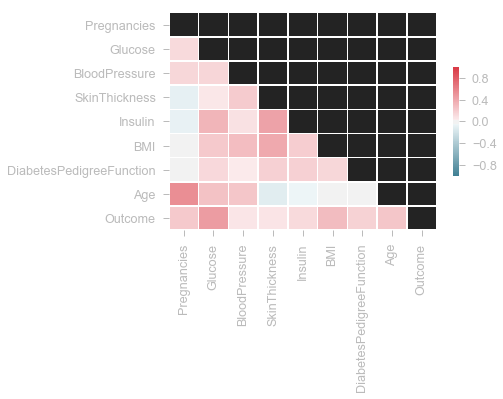

In [6]:
# generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

## Train / Test Split

separate dependent and independent features

In [7]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Modeling

## Model Creation

We build the random forest by making use of sklearn.

In [9]:
steps = [
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(n_estimators = 1000, random_state = 42, bootstrap=True))
]

pipeline = Pipeline(steps)

# train the Decision Tree
clf = pipeline.fit(X_train, y_train)

# prediction for Test data
y_pred = clf.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## Model Evaluation

## Baseline Classifier

In [10]:
total = len(y_test)
sum_y_test = np.sum(y_test)
max_group = [sum_y_test if sum_y_test>(total-sum_y_test) else (total-sum_y_test)]
max_group[0] / total *100

64.28571428571429

We have a baseline classifier of 64 %.

## Random Forest Classifier

create a confusion matrix

In [14]:
y_pred_class = [round(i, 0) for i in y_pred]

In [15]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[86, 13],
       [19, 36]], dtype=int64)

In [16]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(86, 13, 19, 36)

calculate accuracy

In [17]:
accuracy_score(y_true=y_test, y_pred=y_pred_class) * 100

79.22077922077922

Our classifier has an accuracy of over 80 %!

# Variable Importance

In [14]:
importances = list(RandomForestClassifier(n_estimators = 1000, random_state = 42, bootstrap=True).fit(X_train, y_train).feature_importances_)

In [15]:
importances

[0.08195513123964288,
 0.2616342443881773,
 0.09277957240698897,
 0.07140738683029438,
 0.07384818673848668,
 0.15968538007032665,
 0.12720666579457607,
 0.1314834325315072]

In [16]:
feature_names = X_train.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
# create a list with feature importances
feature_importance = pd.DataFrame([(feature_names, round(importances, 2)) for feature_names, importances in zip(feature_names, importances)],
                                  columns=['feature', 'importance'])

# sort the importances by most importance first
feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)

,feature,importance
1,Glucose,0.26
5,BMI,0.16
6,DiabetesPedigreeFunction,0.13
7,Age,0.13
2,BloodPressure,0.09
0,Pregnancies,0.08
3,SkinThickness,0.07
4,Insulin,0.07


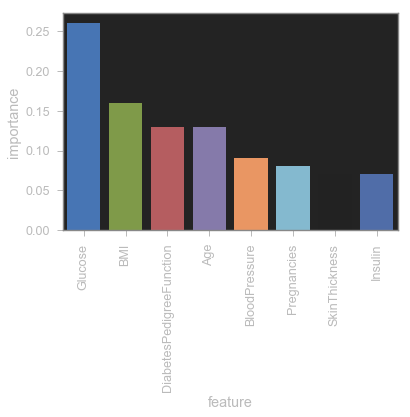

In [23]:
g = sns.barplot(data=feature_importance, x='feature', y='importance')
g.set_xticklabels(labels=feature_importance['feature'], rotation=90)  # set x tick-labels vertically
feature_importance